![image](poly.png)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
df = pd.read_csv("Position_Salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


array([[<AxesSubplot:title={'center':'Level'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

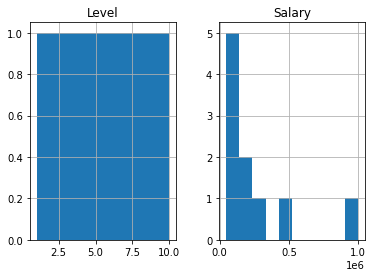

In [4]:
df.hist()

In [5]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [7]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

<AxesSubplot:>

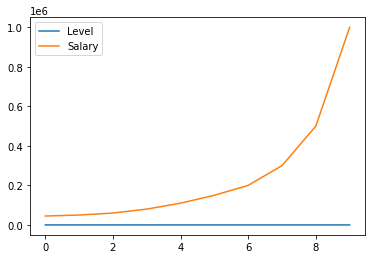

In [10]:
df.plot()

In [28]:
#Seperate into dependant and independant variables
X = df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [29]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [30]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [31]:
#Train linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [40]:
#Train polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X)
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [44]:
#Create a new linear regression
lr_2 = LinearRegression()
lr_2.fit(X_poly,y)

LinearRegression()

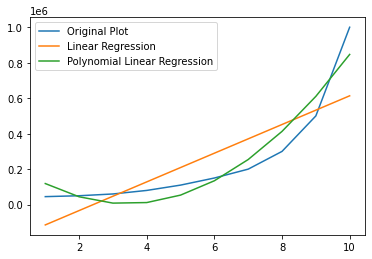

In [50]:
#Visualise the linear result
plt.plot(X,y,label='Original Plot')
plt.plot(X,lr.predict(X),label="Linear Regression")
plt.plot(X,lr_2.predict(X_poly),label='Polynomial Linear Regression')
plt.legend()

In [57]:
#Increase the degree of polynomial equation
from sklearn.preprocessing import PolynomialFeatures
poly_reg_2 = PolynomialFeatures(degree=4)
X_poly_2=poly_reg_2.fit_transform(X)
X_poly_2

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [58]:
#Create a new linear regression
lr_3 = LinearRegression()
lr_3.fit(X_poly_2,y)

LinearRegression()

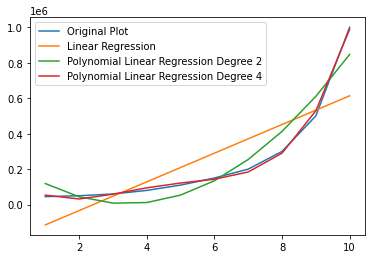

In [59]:
#Visualise the linear result
plt.plot(X,y,label='Original Plot')
plt.plot(X,lr.predict(X),label="Linear Regression")
plt.plot(X,lr_2.predict(X_poly),label='Polynomial Linear Regression Degree 2')
plt.plot(X,lr_3.predict(X_poly_2),label='Polynomial Linear Regression Degree 4')
plt.legend()

In [61]:
lr.predict([[6.5]])

array([330378.78787879])

In [66]:
lr_2.predict(poly_reg.fit_transform([[6.5]]))

array([189498.10606061])

In [67]:
lr_3.predict(poly_reg_2.fit_transform([[6.5]]))

array([158862.45265155])